In [16]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random



dataset Size 1000
character 2
w = [2,−3.4]⊤
b = 4.2
e : random noise, normal distribution 

### create dataset

In [17]:
num_inputs = 2
num_examples = 10
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
print(features)

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
print(labels)

labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)
print(labels)

tensor([[ 0.4629,  0.6933],
        [ 0.9913,  1.4304],
        [-1.2397, -1.5842],
        [-0.7015,  0.9182],
        [-0.5668,  0.7889],
        [-2.2187, -0.8940],
        [-1.4312, -0.7930],
        [ 1.4841,  0.0201],
        [-0.5183, -0.6868],
        [ 0.8624,  0.5563]])
tensor([ 2.7686,  1.3192,  7.1067, -0.3248,  0.3840,  2.8022,  4.0339,  7.0999,
         5.4984,  4.0332])
tensor([ 2.7749,  1.3167,  7.1216, -0.3293,  0.3883,  2.8249,  4.0396,  7.1120,
         5.4983,  4.0324])


In [18]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)
print(features[0], labels[0])




tensor([0.4392, 0.6446]) tensor(2.8914)


### scatter plot

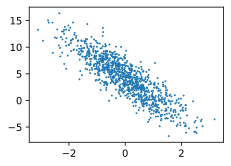

In [19]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
#生成第二个特征features[:, 1]和标签 labels 的散点图
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

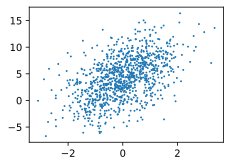

In [20]:
set_figsize()
#生成第一个特征features[:, 1]和标签 labels 的散点图
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1);

can use a package d2lzh_pytorch
use .plot or .set_figsize()

In [21]:
#define a function that everytime it return a batch size of 
# random sample character and label

In [22]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)


In [23]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.1131, -0.1584],
        [ 0.6943, -0.7654],
        [ 1.1101, -0.7142],
        [-1.3507,  1.1120],
        [ 1.6703,  1.4244],
        [ 0.6174,  0.0035],
        [-0.5694,  0.8599],
        [-0.7921,  0.1426],
        [-1.2174,  1.1168],
        [ 0.2221,  0.0831]]) tensor([ 4.5110,  8.1978,  8.8462, -2.2818,  2.6812,  5.4177,  0.1212,  2.1306,
        -2.0338,  4.3599])


## 3.2.3 initialize model

In [24]:
#weight 
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
#bias
b = torch.zeros(1, dtype=torch.float32)

In [25]:
print(w)
print(b)

tensor([[0.0038],
        [0.0033]])
tensor([0.])


In [26]:
#set requires_grad=True
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 



tensor([0.], requires_grad=True)

## 3.2.4 define a model

In [27]:
#mm do 矩阵乘法
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b


### 3.2.5 define lost function

In [28]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [29]:
### 3.2.6 sgd 优化 lost function 
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data
        

In [30]:
#learning rate 
lr = 0.03
#迭代周期（epoch）中，我们将完整遍历一遍data_iter函数
num_epochs = 3
#def linreg(X, w, b): 
net = linreg
#def squared_loss(y_hat, y):
loss = squared_loss



In [31]:
for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))




epoch 1, loss 0.034371
epoch 2, loss 0.000125
epoch 3, loss 0.000052


In [32]:
print(true_w, '\n', w)
print(true_b, '\n', b)


[2, -3.4] 
 tensor([[ 2.0001],
        [-3.3994]], requires_grad=True)
4.2 
 tensor([4.1993], requires_grad=True)
